
# Plotting diamonds Dataset

- Explore plotting the diamonds dataset that comes with the ggplot2 package.   
- The dataset includes data like the quality, clarity, and cut for over 50,000 diamonds. 

In [1]:
suppressMessages(library(tidyverse))
library(ggplot2)
data(diamonds)


## Exploring the data  


In [2]:
library(skimr)
skim(diamonds)

── Data Summary ────────────────────────
                           Values  
Name                       diamonds
Number of rows             53940   
Number of columns          10      
_______________________            
Column type frequency:             
  factor                   3       
  numeric                  7       
________________________           
Group variables            None    

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 cut                   0             1 TRUE           5
2 color                 0             1 TRUE           7
3 clarity               0             1 TRUE           8
  top_counts                                   
1 Ide: 21551, Pre: 13791, Ver: 12082, Goo: 4906
2 G: 11292, E: 9797, F: 9542, H: 8304          
3 SI1: 13065, VS2: 12258, SI2: 9194, VS1: 8171 

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable

In [3]:
library(patchwork)


## Distributions with bar plots

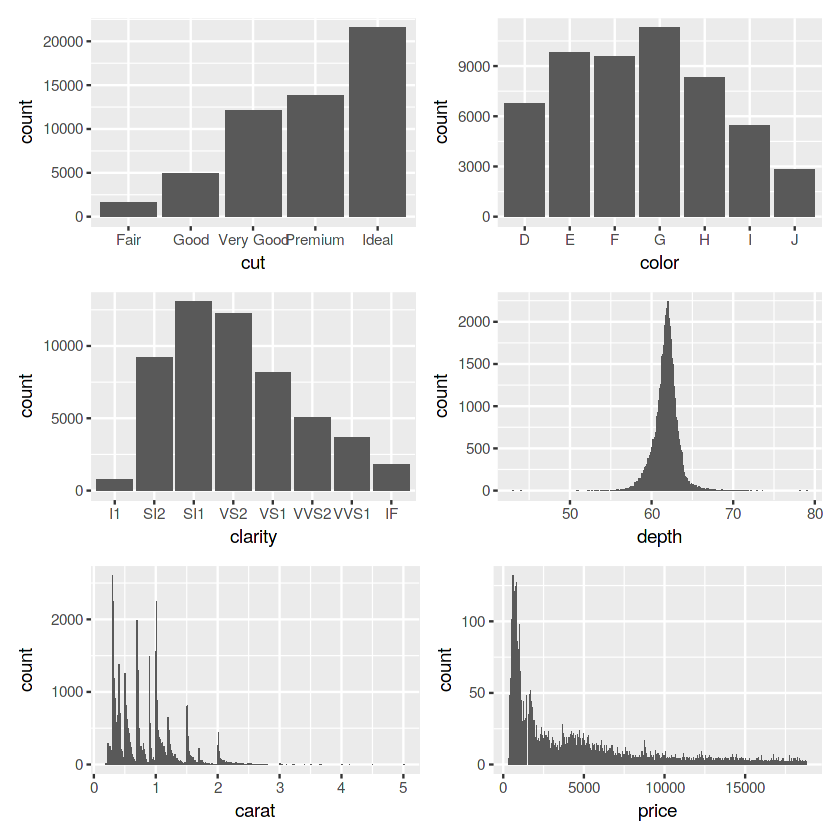

In [4]:
# Checking counts for each variable to understand the distribution
# geom_bar automatically counts rows as the y value.  


p1 <- ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut))
p2 <- ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = color))
p3 <- ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = clarity))
p4 <- ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = depth))
p5 <- ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = carat))
p6 <- ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = price))

#Plotting using patchwork library

(p1 | p2) /
(p3 | p4) /
(p5 | p6)

Some quick observations about the data can be made at this stage:
- Data points for diamonds of poor **cut** and bad **color** are sparse
- Similarly, diamonds at very good (I1) and very bad (IF) **clarity** are also rare
- **Carat** follows an interesting trend with large spikes at **significant carats** (0.5, 1, 1.5, 2)

- The color aesthetic will add color to the outline of each bar.  
- Now, fill is used to show the split of various diamond.color values for each diamond.cut. 
- This is a *stacked bar chart*


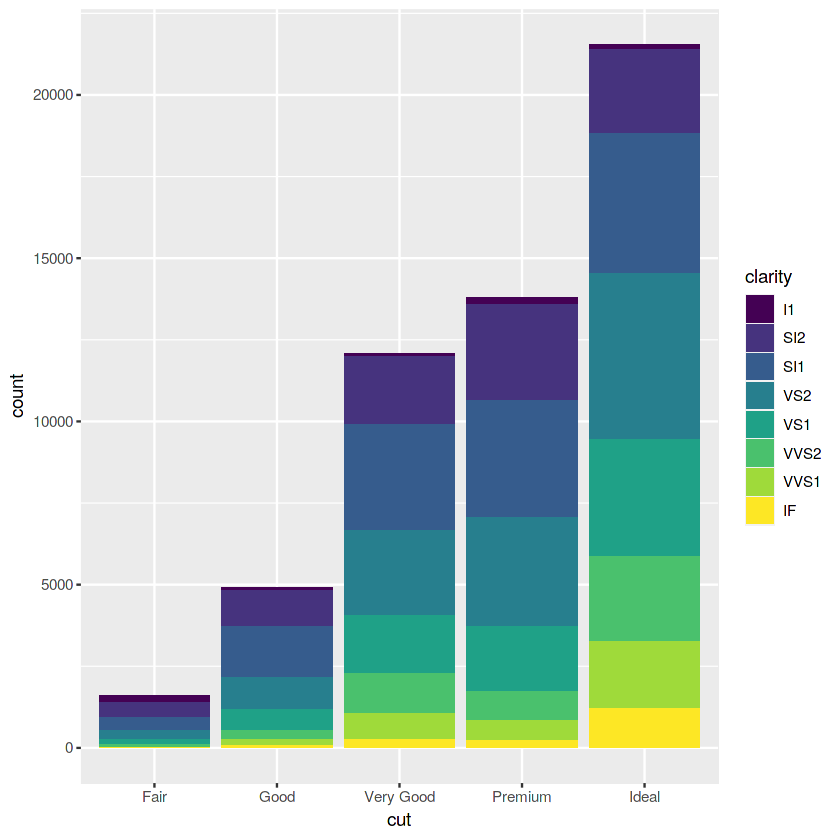

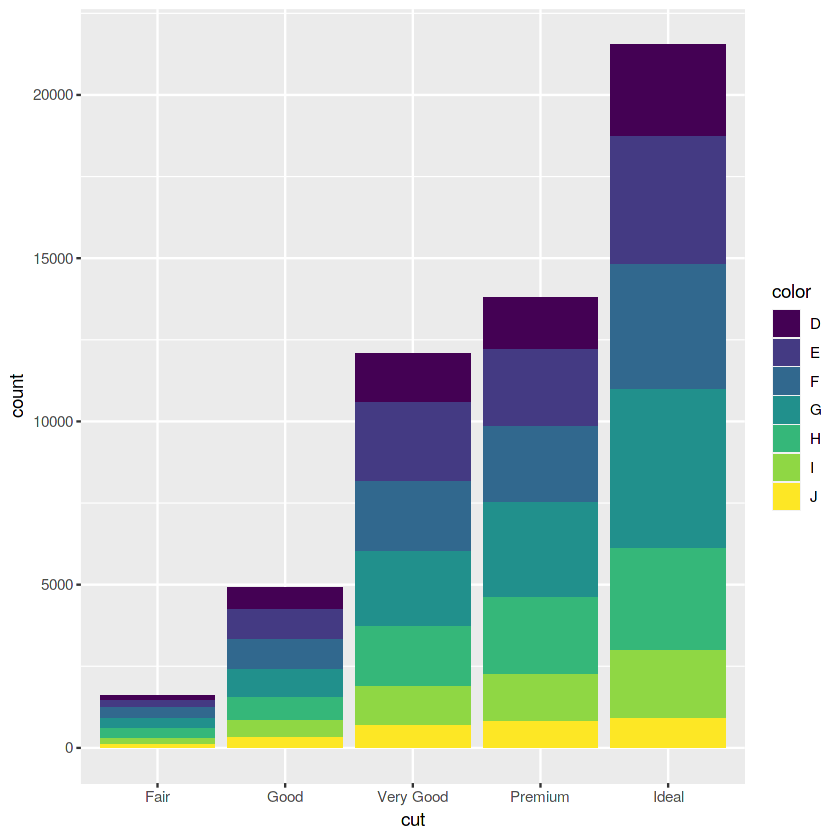

In [5]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = clarity))
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, fill = color))

# Scatter and Box Plots

In [6]:
diamonds_summ <- diamonds %>% 
              group_by(cut) %>% 
              summarise(average_price = mean(price), 
                        median = median(price),
                        sd = sd(price),
                        se = stderr())


This gives summary statistics for the dataset:

In [7]:
diamonds_summ

cut,average_price,median,sd,se
<ord>,<dbl>,<dbl>,<dbl>,<terminal>
Fair,4358.758,3282.0,3560.387,2
Good,3928.864,3050.5,3681.590,2
Very Good,3981.760,2648.0,3935.862,2
Premium,4584.258,3185.0,4349.205,2
Ideal,3457.542,1810.0,3808.401,2


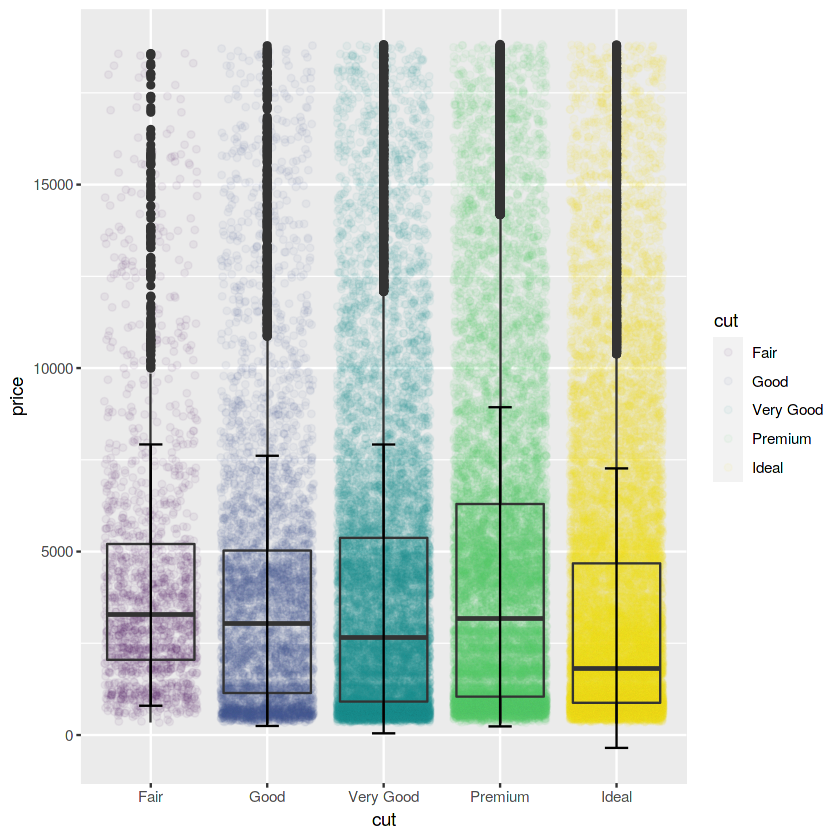

In [8]:
plot_cut1 = ggplot() + 
  geom_point(data=diamonds,aes(x=cut,y=price, color = cut),
             position="jitter" , alpha=.05)+  #dodge width around the centre line
  geom_boxplot(data=diamonds,aes(x=cut,y=price), fill = "transparent")

limits = aes(x = cut, y = average_price,ymax= average_price+sd, ymin= average_price-sd )

plot_cut2 = plot_cut1+
  geom_errorbar(data = diamonds_summ,limits,
                 width=0.2 ) 

plot_cut2

- Across each of the Cuts, the mean **price is almost the same**. 
- Therefore, Cut doesn't predict the price.  
- The other factors must be explored.  

### Scatter Plot of Price vs Carat across Cuts

Price is plotted against Carat, while using color to distinguish the Cut. 

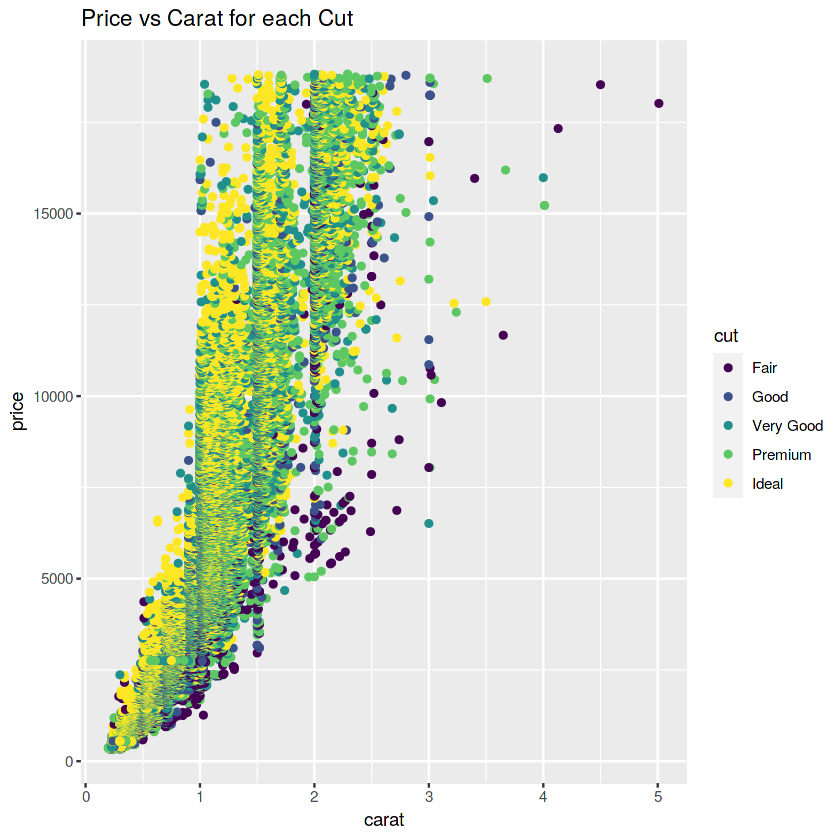

In [9]:
ggplot(data = diamonds, aes(x = carat, y = price, color = cut)) +
  geom_point()+
  ggtitle("Price vs Carat for each Cut")


- We can observe that there **aren't many data points at 1.9 or 1.4 carats**  
- This is indicative of market demand for significant threshold in carats such as 2 or 1.5

- Splitting the data with a plot for each type of cut. 
- ggplot2 does this with the facet_wrap() function:

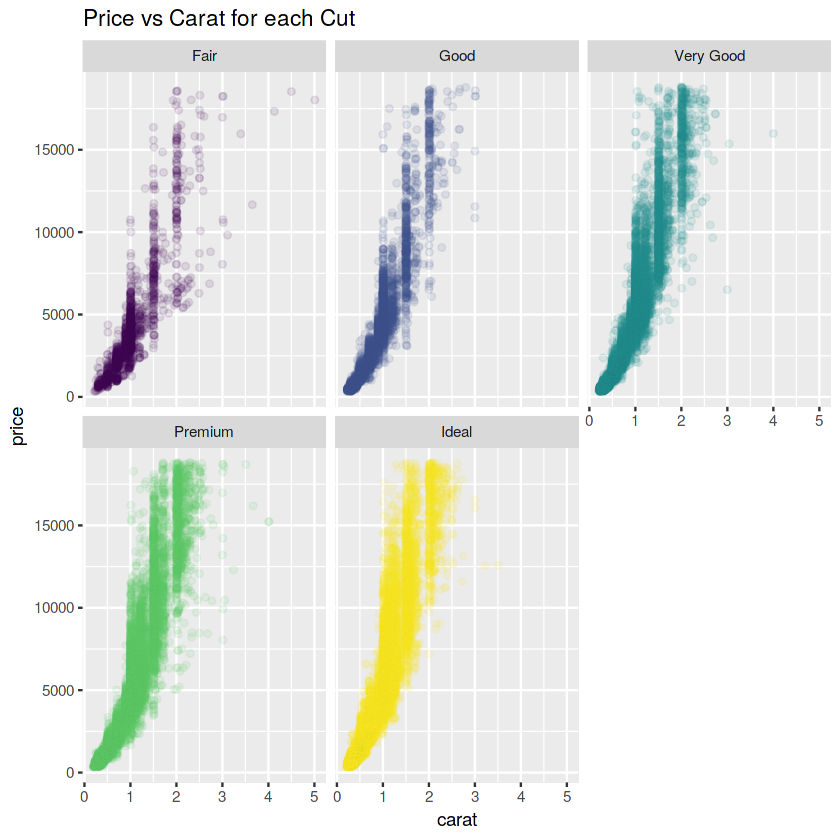

In [10]:
ggplot(data = diamonds, aes(x = carat, y = price, color = cut)) +
geom_point(alpha=.1) +  #Transparent to overcome overplotting 
facet_wrap(~cut)+
theme(legend.position = "none") +
ggtitle("Price vs Carat for each Cut")

- The distinct **preference for significant carats** like (1, 1.5, 2) is clearly visibly
- Fair and Good cuts have fewer data points for higher carats  
- This shows either a lack of supply of *expensive-badly cut* diamonds or a lack of demand

### Scatter Plot of Price vs Carat across Colors of diamonds

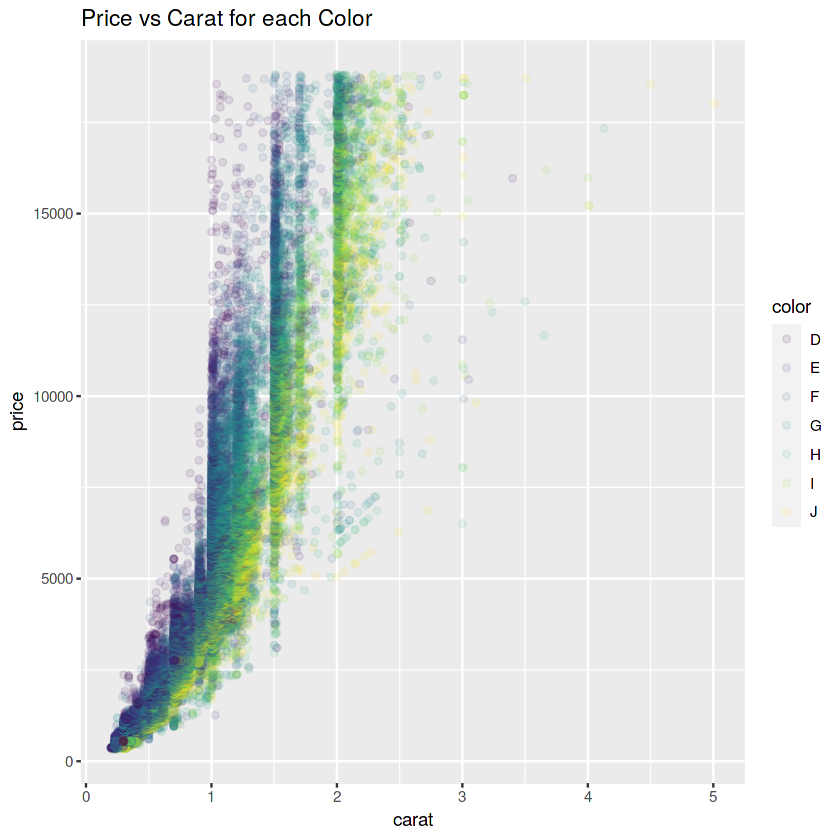

In [11]:
ggplot(data = diamonds, aes(x = carat, y = price, color = color)) +
geom_point(alpha=.1)+         #Transparent to overcome overplotting 
ggtitle("Price vs Carat for each Color")

### Scatter Plot of Price vs Carat across Clarity  

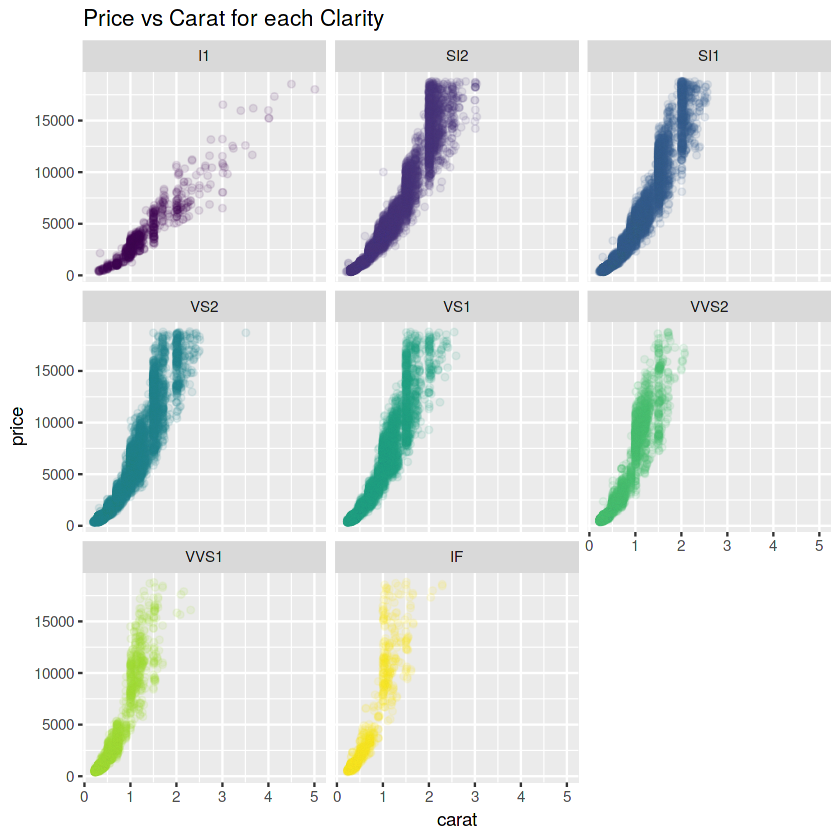

In [12]:
ggplot(data = diamonds, aes(x = carat, y = price, color = clarity)) +
geom_point(alpha=.1) +  #Transparent to overcome overplotting 
facet_wrap(~clarity)+
theme(legend.position = "none") +
ggtitle("Price vs Carat for each Clarity")

- Depth is a continuous variable that can't be used to facet_wrap. In this case you can discretise it frst.
#### Facet Wrap and Continous Variables

In [13]:
diamonds$depth_n <- cut_number(diamonds$depth, 6)

- This new depth can be used as the color in aes, and for facet_wrap

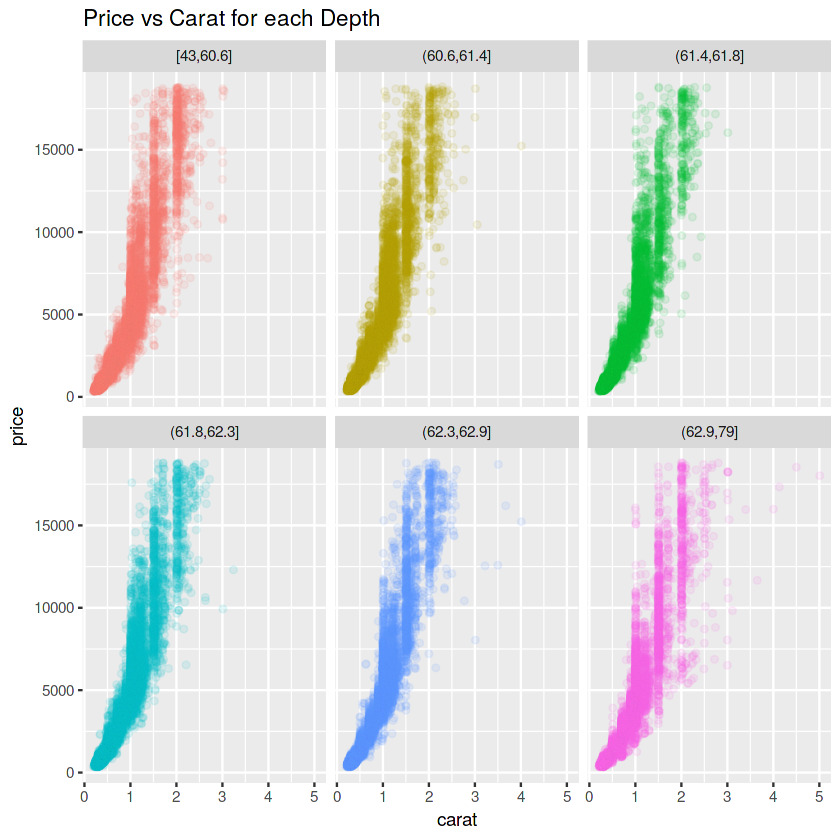

In [14]:
ggplot(data = diamonds, aes(x = carat, y = price, color = depth_n)) +
geom_point(alpha=.1) +  #Transparent to overcome overplotting 
facet_wrap(~depth_n)+
theme(legend.position = "none") +
ggtitle("Price vs Carat for each Depth")

## Exploring Correlation Values

In [15]:
diamonds_corr <- diamonds %>% 
  select(price,carat,depth,table) %>% 
  drop_na() %>% 
  cor() %>% 
  round(2)

diamonds_corr

,price,carat,depth,table
price,1.00,0.92,-0.01,0.13
carat,0.92,1.00,0.03,0.18
depth,-0.01,0.03,1.00,-0.30
table,0.13,0.18,-0.30,1.00


- **Carat** is the strongest predictor of price.
- **Depth** and **Table** have no correlation to price. 
- Keeping carat constant, we can check the influence of Color, Cut, Clarity

In [16]:
# Diamonds of carat = 0.9
diamonds_filter <- diamonds %>%
                  filter(carat == 0.9)
      

p_color <- ggplot(data = diamonds_filter, aes(x=color,y=price))+
            geom_point()+
            facet_grid(cut~clarity)

p_clarity <-  ggplot(data = diamonds_filter, aes(x=clarity,y=price, group = carat))+
              geom_point()+
              facet_grid(color~cut)

p_cut <- ggplot(data = diamonds_filter, aes(x=cut,y=price, group = carat))+
              geom_point()+
              facet_grid(clarity~color)


# Effect of Color on Price, Controlling for other variables

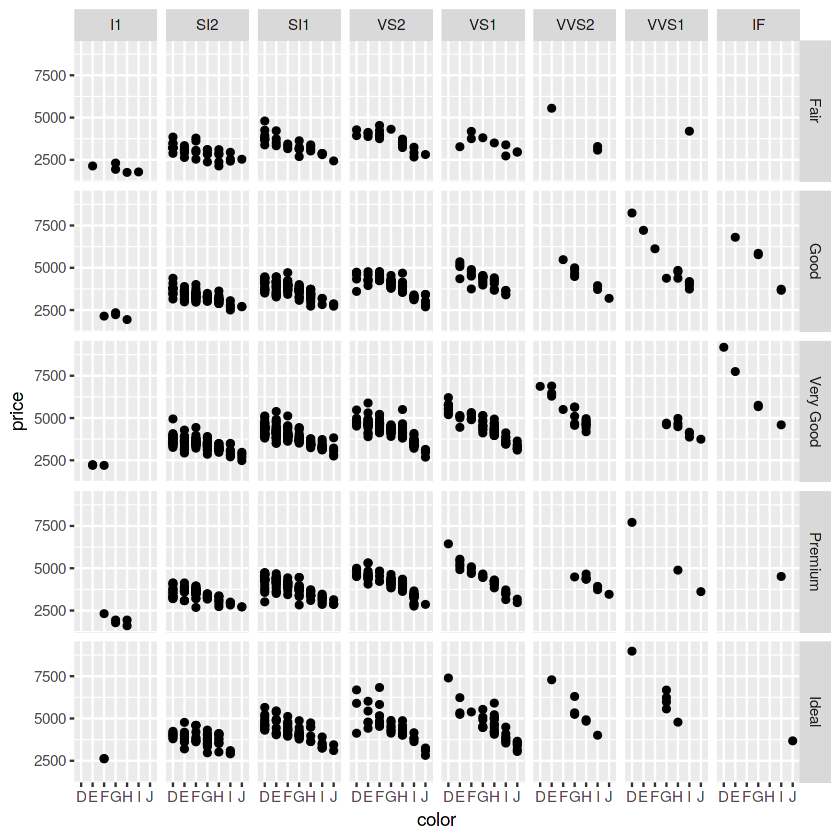

In [17]:
p_color

-**Better the color(D), higher the price**  .       
-The relationship is more pronounced in **VVS2 to IF Clarity**.  
-But this could be due to fewer data points.   
-For poorer Clarity & Cut, the price is almost the same across Colors


Explore a subset of the data, considering only the *'nicer'* clarity values:  
**Clarity**: VVS2, VVS1, IF   
**Cut**: All but Fair  
**Color**: All  

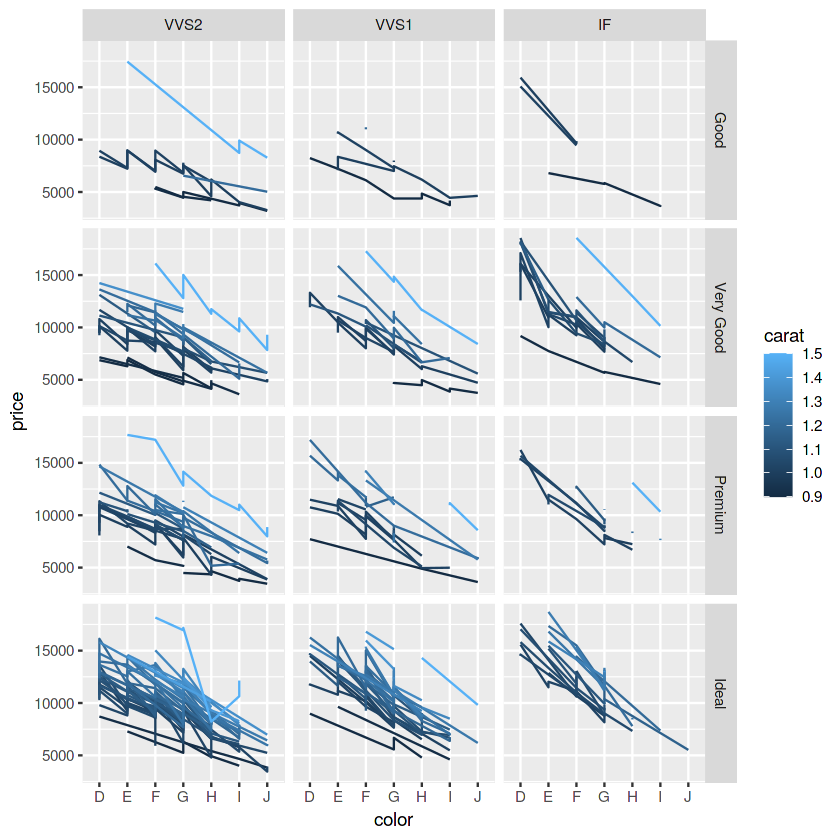

In [18]:
diamonds %>%
  filter(carat>=0.9 & carat<=1.5, clarity =="VVS2"|clarity=="VVS1"|clarity=="IF",cut!="Fair") %>% 
  ggplot(aes(x=color,y=price,group=carat,color=carat))+
  geom_line()+
  facet_grid(cut~clarity)

In the better clarity range, very few observations exist with Good or worse cuts. This makes sense as the resulting diamond (bad cut, but excellent clarity) wouldn't be a desirable product. 

# Effect of Cut on Price, Controlling for other variables

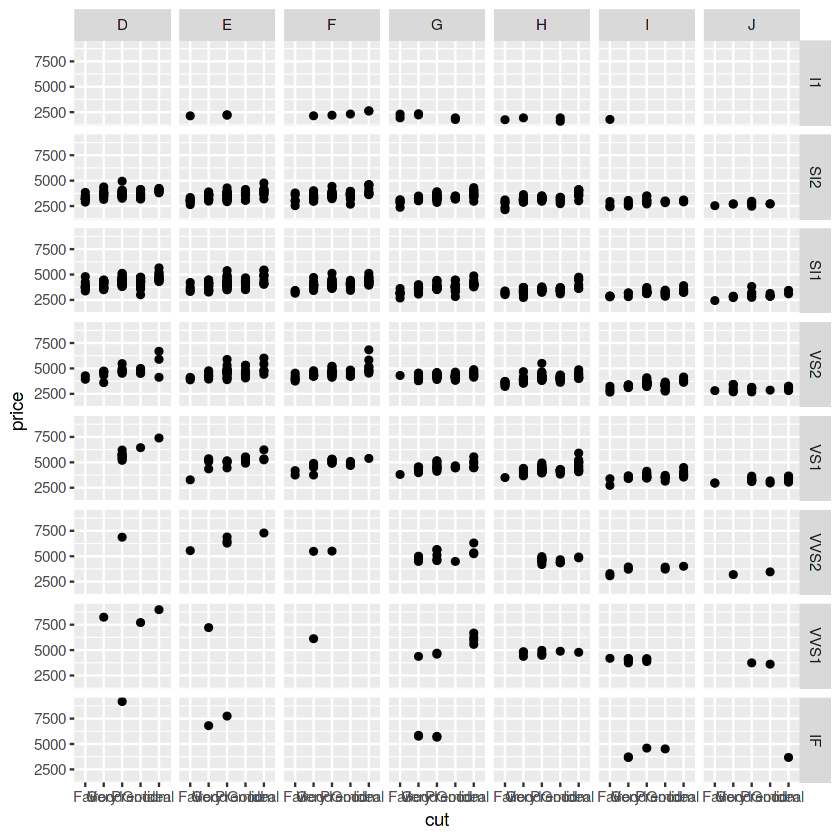

In [19]:
p_cut

# Effect of Clarity on Price, Controlling for other variables

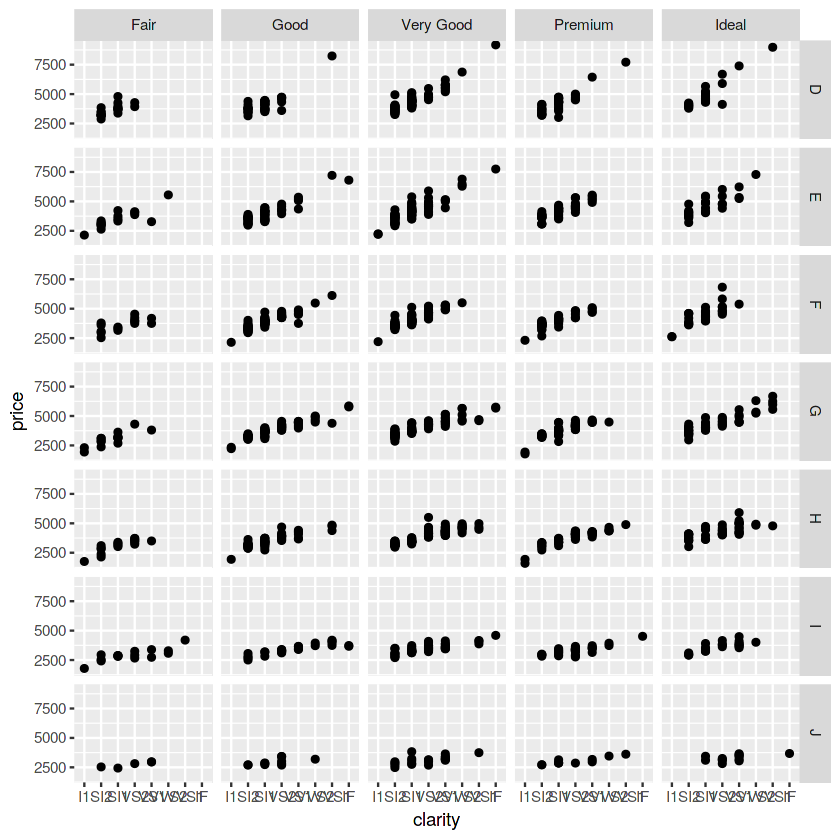

In [20]:
p_clarity